# Homework 03


## Part 1 - Questions

### Question 1: 

what is the ratio of hate crimes like regarding of anti-homosexual purpose in NYC last year?

* Who (population): hate crime suspects
* What (subject, discipline): anti-homosexual purpose
* Where (location): nyc
* When (snapshot, longitudinal): 2020
* How much data do you need to do the analysis/work: n/a

### Question N: 

what kind of felony last year in nyc hate crimes is regarding of anti-racial matters last year?

* Who (population): hate crime criminals
* What (subject, discipline): anti-racial felonies
* Where (location): nyc
* When (snapshot, longitudinal): 2020
* How much data do you need to do the analysis/work: n/a

### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?
NYPD; News and the media press; LGBTQ groups; Black community; Asian community; Jewish community and etc.


## Part 2 - Selecting a Data Set, Adding Documentation



1. Name / Title: NYPD Hate Crimes
2. Link to Data: https://data.cityofnewyork.us/Public-Safety/NYPD-Hate-Crimes/bqiq-cu78 
3. Source / Origin: 
	* Author or Creator: Police Department (NYPD)
	* Publication Date: October 29, 2020
	* Publisher: NYC OpenData
	* Version or Data Accessed: February 22, 2021
4. License: https://opendata.cityofnewyork.us/overview/ 
https://www1.nyc.gov/home/terms-of-use.page 
5. Can You Use this Data Set for Your Intended Use Case? Yes, it can. This dataset is very informative and I can use it to answer my questions previously made. 

## Format




### Overview

* Format: format is .csv file (TODO add what file format the data is in)
* Size: 131KB (TODO how large is the file in KB, MB, GB, etc. ... use finder, windows explorer for this)
* Number of Records: 728 rows, 15 columns 



### Sample of Data




In [332]:

### Fields or Column Headers

* Field/Column 1: Arrest Date           type: str  (TODO add field name and potential type using Python types)
* Field/Column 2: Month Number          type: int  (TODO same as above)
* Field/Column N: Offense Description   type: str  (TODO same as above)

SyntaxError: invalid syntax (<ipython-input-332-145f30f3906e>, line 3)

In [333]:
# TODO show a few lines of data from the actual file
import csv
# import pandas as pd
# f = pd.read_csv('../data/raw/NYPD_Hate_Crimes.csv') 
# f.head(2)
# file = 
with open('../data/raw/NYPD_Hate_Crimes.csv','r') as fh:
    # all_lines = fh.readlines()
    header = [h.lstrip() for h in next(fh).split(',')]
    print(header)
    # print(header[-4])
    all_lines = fh.readlines()
    # print(len(all_lines))
    year_count = 0
    for line in all_lines:
        line_parts = line.split(',')
        if int(line_parts[1]) ==2020:
            count+=1
        #all felony hate crimes in 2020 Feb
        if line_parts[7] == 'FELONY' and int(line_parts[1]) ==2020 and int(line_parts[2])==1:
            print(line)
        # print(all_lines[0])
    print(count)
# Use "regular" Python to do this in this code block
# Assume that jupyter-lab was started in your root directory
# with open('./data/raw/example-data.csv', 'r'): 

['Full Complaint ID', 'Complaint Year Number', 'Month Number', 'Record Create Date', 'Complaint Precinct Code', 'Patrol Borough Name', 'County', 'Law Code Category Description', 'Offense Description', 'PD Code Description', 'Bias Motive Description', 'Offense Category', 'Other Motive Description', 'Arrest Date', 'Arrest Id\n']
202009000001199,2020,1,01/01/2020,90,PATROL BORO BKLYN NORTH,KINGS,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-JEWISH,Religion/Religious Practice,,01/01/2020,K20600175

202007900074999,2020,1,01/29/2020,79,PATROL BORO BKLYN NORTH,KINGS,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",OTHER,Other,ASIAN & SEX ORIENTATION,01/29/2020,K20604390

202000500020499,2020,1,01/14/2020,5,PATROL BORO MAN SOUTH,NEW YORK,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,,01/14/2020,M20601699

202002000038899,2020,1,01/30/2020,20,PATROL BORO MAN NORTH,NEW YORK,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWIS


## Part 3 - Extract / Transform

* TODO describe your process for extracting, transforming, cleaning your incoming data:



* what columns you will be using (extracting) from your dataset
- ans: I will be using 'offense category', 'bias motive description' and 'offense description' and 'Law Code Category Description'

* how you are planning to convert the data into analogous python types / how you will deal with type issues (for example, you may want a column that is numeric, but the data contains a label, such as 4 months) 
- ans: I'm not sure if I am going to transform data types, and if I need to transform, I will need to strip the data to reduce the unnecessary parts

* any other kind of cleaning (_normalizing_ data, filling in missing values, etc.) that you will have to perform
- ans: I would need to separate probably different type of offense category. For example, create new columns based on if the criminals commited the crime of anti-racial 'yes' - 1; 'no' - 0; 

* what you will use a generator for...
- ans: I will need a generator to first remove other years data, I only need 2020. and then i need to separate the hate crime with different offense categories 



In [334]:
# TODO write code here!
# need 1) offense sexual orientation 2) felony 3) anti-racial
# def
def generator_h_hc():
    num = 1
    with open('../data/raw/NYPD_Hate_Crimes.csv','r') as fh:
        all_lines = fh.readlines()
        for line in all_lines:
            line_parts = line.split(',')
            
            if line_parts[-4] == 'Sexual Orientation' and int(line_parts[1]) ==2020 or 'orientation'.upper() in line_parts[-3]:
    # while True:
                
                if 'misdemeanor'.upper() in line_parts[7]:
                    line_parts.append(1)
                elif ('violation'.upper()) in line_parts[7]:
                    
                    line_parts.append(2)
                elif 'felony'.upper() in line_parts[7]:
                    line_parts.append(3)
                else:
                    line_parts.append(0)
                yield [num, int(line_parts[2]), line_parts[-6], line_parts[7], line_parts[-1]]
                # yield 
                num += 1
            # elif 'Race' in line_parts[-4] and int(line_parts[1]) ==2020 and line_parts[7] == 'FELONY':
            #     line_parts.append(4)
            else:
                line_parts.append(0)


In [335]:
a = generator_h_hc()
# next(a)

In [336]:
# next(a)
lissy = [n for n in a]
# print(lissy)
for n in lissy:
    print(n)

[1, 2, 'ANTI-MALE HOMOSEXUAL(GAY)', 'MISDEMEANOR', 1]
[2, 7, 'ANTI-MALE HOMOSEXUAL(GAY)', 'FELONY', 3]
[3, 7, 'ANTI-MALE HOMOSEXUAL(GAY)', 'FELONY', 3]
[4, 10, 'ANTI-MALE HOMOSEXUAL(GAY)', 'MISDEMEANOR', 1]
[5, 12, 'ANTI-FEMALE HOMOSEXUAL(GAY)', 'FELONY', 3]
[6, 1, 'OTHER', 'FELONY', 3]
[7, 8, 'ANTI-MALE HOMOSEXUAL(GAY)', 'FELONY', 3]
[8, 1, 'ANTI-LGBT(MIXED GROUP)', 'MISDEMEANOR', 1]
[9, 1, 'ANTI-LGBT(MIXED GROUP)', 'MISDEMEANOR', 1]
[10, 6, 'ANTI-MALE HOMOSEXUAL(GAY)', 'FELONY', 3]
[11, 5, 'ANTI-MALE HOMOSEXUAL(GAY)', 'FELONY', 3]
[12, 10, 'ANTI-MALE HOMOSEXUAL(GAY)', 'MISDEMEANOR', 1]
[13, 12, 'ANTI-MALE HOMOSEXUAL(GAY)', 'FELONY', 3]
[14, 11, 'ANTI-MALE HOMOSEXUAL(GAY)', 'MISDEMEANOR', 1]
[15, 5, 'ANTI-MALE HOMOSEXUAL(GAY)', 'MISDEMEANOR', 1]
[16, 9, 'ANTI-MALE HOMOSEXUAL(GAY)', 'FELONY', 3]
[17, 10, 'ANTI-MALE HOMOSEXUAL(GAY)', 'MISDEMEANOR', 1]
[18, 7, 'ANTI-MALE HOMOSEXUAL(GAY)', 'VIOLATION', 2]
[19, 8, 'ANTI-MALE HOMOSEXUAL(GAY)', 'VIOLATION', 2]
[20, 8, 'ANTI-MALE HOMOSEXUAL(G

In [337]:
def generator_r_hc():
    num = 1
    with open('../data/raw/NYPD_Hate_Crimes.csv','r') as fh:
        all_lines = fh.readlines()
        for line in all_lines:
            line_parts = line.split(',')
            
            if 'Race' in line_parts[-4] and int(line_parts[1]) ==2020 and line_parts[7] == 'FELONY':
                if 'UNCLASSIFIED' in line_parts[-6]:
                    line_parts.append(-1)
                elif 'pulic'.upper() in line_parts[-6]:
                    line_parts.append(1)
                elif 'ELECTRONIC' in line_parts[-6]:
                    line_parts.append(2)
                elif 'HARASSMENT' in line_parts[-6]:
                    line_parts.append(3)
                elif 'TERRORISTIC' in line_parts[-6]:
                    line_parts.append(4)
                elif 'MENACING' in line_parts[-6]:
                    line_parts.append(5)
                else:
                    line_parts.append(6)
                yield [num, int(line_parts[2]), line_parts[-6], line_parts[-7],line_parts[-1]]


                num += 1
            else:
                line_parts.append(0)

In [338]:
b = generator_r_hc()

In [339]:
li = [i for i in b]
for i in li:
    print(i)

[1, 3, 'ANTI-ASIAN', 'UNCLASSIFIED"', -1]
[2, 3, 'ANTI-ASIAN', 'UNCLASSIFIED"', -1]
[3, 3, 'ANTI-ASIAN', 'UNCLASSIFIED"', -1]
[4, 7, 'ANTI-ASIAN', 'AGGRAVATED HARASSMENT 1', 3]
[5, 3, 'ANTI-ASIAN', 'UNCLASSIFIED"', -1]
[6, 3, 'ANTI-ASIAN', 'PERSONAL ELECTRONIC DEVICE(SNATCH)"', 2]
[7, 3, 'ANTI-ASIAN', 'UNCLASSIFIED"', -1]
[8, 6, 'ANTI-WHITE', 'UNCLASSIFIED"', -1]
[9, 3, 'ANTI-ASIAN', 'AGGRAVATED HARASSMENT 1', 3]
[10, 5, 'ANTI-ASIAN', 'MENACING 1ST DEGREE (VICT NOT', 5]
[11, 8, 'ANTI-WHITE', 'OPEN AREA UNCLASSIFIED"', -1]
[12, 12, 'ANTI-BLACK', 'UNCLASSIFIED"', -1]
[13, 12, 'ANTI-ASIAN', 'PUBLIC PLACE INSIDE"', 6]
[14, 3, 'ANTI-ASIAN', 'AGGRAVATED HARASSMENT 1', 3]
[15, 6, 'ANTI-BLACK', 'UNCLASSIFIED"', -1]
[16, 4, 'ANTI-ASIAN', '    UNCL 2ND"', 6]
[17, 8, 'ANTI-BLACK', 'UNCLASSIFIED"', -1]
[18, 9, 'ANTI-MULTI RACIAL GROUPS', 'AGGRAVATED HARASSMENT 1', 3]
[19, 6, 'ANTI-BLACK', 'AGGRAVATED HARASSMENT 1', 3]
[20, 8, 'ANTI-BLACK', 'AGGRAVATED HARASSMENT 1', 3]
[21, 9, 'ANTI-ASIAN', 'UNCLA

## Part 4 - Descriptive Statistics

### Analysis on Numeric Data

#### Central Tendency



In [340]:
import numpy as np
from scipy import stats
#mode of month in anti-sexual orientation hate crimes in 2020
new_lissy = [i[1] for i in lissy]
mde = stats.mode(new_lissy)
print(mde[0])


[10]


In [341]:
#mode of month in felony for anti-race hate crimes in 2020
new_li = [i[1] for i in li]
mode = stats.mode(new_li)
print(mode[0])
# TODO: copy and paste your results here

[3]


#### Dispersion

In [342]:
#standard deviation of offense category anti-sexual orientation hate crimes in 2020
lissy_2nd = [i[-1] for i in lissy]
std_1 = np.std(lissy_2nd) 
std_1

# TODO: copy and paste your results here

0.9719044901378625

In [343]:
#standard deviation in felony for anti-race hate crimes in 2020
li_2nd = [i[-1] for i in li]
std_2 = np.std(li_2nd) 
std_2

2.512276634494756

#### Outliers


In [344]:
#using z-score
outliers = []
def outlier(lisy):
    
    threshold=3
    me = np.mean(lisy)
    std =np.std(lisy)
    for x in lisy:
        z_score= (x - me)/std
        if np.abs(z_score) > threshold:
            outliers.append(x)
    return outliers
res = outlier(lissy_2nd)
res_li = outlier(li_2nd)
res
res_li
# TODO: copy and paste your results here

[]

#### Other


In [345]:
#median of the offense category
med_2 = np.median(li_2nd) 
med_2


# TODO: copy and paste your results here

3.0

In [346]:
#median of in felony category for anti-race hate crimes in 2020
median_2 = np.median(lissy_2nd) 
median_2

2.5

###  Analysis on Categorical Data

#### Frequency

In [347]:
#frequency of unique crimes 
li_crime = [i[-2] for i in li]
(unique, counts) = np.unique(li_crime, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)
print(unique,counts)
# TODO: copy and paste your results here

[['    UNCL 2ND"' '1']
 ['AGGRAVATED HARASSMENT 1' '10']
 ['CRIMINAL MIS 2 & 3' '1']
 ['MAKING TERRORISTIC THREAT' '1']
 ['MENACING 1ST DEGREE (VICT NOT' '1']
 ['OPEN AREA UNCLASSIFIED"' '1']
 ['PERSONAL ELECTRONIC DEVICE(SNATCH)"' '1']
 ['PUBLIC PLACE INSIDE"' '1']
 ['UNCLASSIFIED"' '12']]
['    UNCL 2ND"' 'AGGRAVATED HARASSMENT 1' 'CRIMINAL MIS 2 & 3'
 'MAKING TERRORISTIC THREAT' 'MENACING 1ST DEGREE (VICT NOT'
 'OPEN AREA UNCLASSIFIED"' 'PERSONAL ELECTRONIC DEVICE(SNATCH)"'
 'PUBLIC PLACE INSIDE"' 'UNCLASSIFIED"'] [ 1 10  1  1  1  1  1  1 12]


In [348]:
##li_crime = [i[-2] for i in lissy]
##(unique, counts) = np.unique(li_crime, return_counts=True)
#frequencies = np.asarray((unique, counts)).T
#print(frequencies)

#### Unique Values

In [349]:
#unique values of anti-racial felony crimes name 
# li_crime = [i[-2] for i in li]
uni = np.unique(li_crime)
print('the unique hate crime types are')
print(uni)
# TODO: copy and paste your results here

the unique hate crime types are
['    UNCL 2ND"' 'AGGRAVATED HARASSMENT 1' 'CRIMINAL MIS 2 & 3'
 'MAKING TERRORISTIC THREAT' 'MENACING 1ST DEGREE (VICT NOT'
 'OPEN AREA UNCLASSIFIED"' 'PERSONAL ELECTRONIC DEVICE(SNATCH)"'
 'PUBLIC PLACE INSIDE"' 'UNCLASSIFIED"']


## Part 5 - Visualizations



In [350]:
#the 
def generator_h2019_hc():
    num = 1
    with open('../data/raw/NYPD_Hate_Crimes.csv','r') as fh:
        all_lines = fh.readlines()
        for line in all_lines:
            line_parts = line.split(',')
            
            if line_parts[-4] == 'Sexual Orientation' and int(line_parts[1]) ==2019 or 'orientation'.upper() in line_parts[-3]:
    # while True:
                
                if 'misdemeanor'.upper() in line_parts[7]:
                    line_parts.append(1)
                elif ('violation'.upper()) in line_parts[7]:
                    
                    line_parts.append(2)
                elif 'felony'.upper() in line_parts[7]:
                    line_parts.append(3)
                else:
                    line_parts.append(0)
                yield [num, int(line_parts[2]), line_parts[-6], line_parts[7], line_parts[-1]]
                # yield 
                num += 1
            # elif 'Race' in line_parts[-4] and int(line_parts[1]) ==2020 and line_parts[7] == 'FELONY':
            #     line_parts.append(4)
            else:
                line_parts.append(0)
# TODO: add visualizations here

TODO Describe the visualizations in the previous cell


In [351]:
c = generator_h2019_hc()
lissy_2019 = [n for n in c]
# print(lissy)
for n in lissy_2019:
    print(n)

[1, 2, 'ANTI-MALE HOMOSEXUAL(GAY)', 'FELONY', 3]
[2, 3, 'ANTI-MALE HOMOSEXUAL(GAY)', 'MISDEMEANOR', 1]
[3, 4, 'ANTI-FEMALE HOMOSEXUAL(GAY)', 'FELONY', 3]
[4, 6, 'ANTI-MALE HOMOSEXUAL(GAY)', 'MISDEMEANOR', 1]
[5, 5, 'ANTI-MALE HOMOSEXUAL(GAY)', 'FELONY', 3]
[6, 7, 'ANTI-MALE HOMOSEXUAL(GAY)', 'FELONY', 3]
[7, 7, 'ANTI-MALE HOMOSEXUAL(GAY)', 'FELONY', 3]
[8, 7, 'ANTI-MALE HOMOSEXUAL(GAY)', 'FELONY', 3]
[9, 7, 'ANTI-MALE HOMOSEXUAL(GAY)', 'FELONY', 3]
[10, 8, 'ANTI-MALE HOMOSEXUAL(GAY)', 'FELONY', 3]
[11, 9, 'ANTI-MALE HOMOSEXUAL(GAY)', 'MISDEMEANOR', 1]
[12, 10, 'ANTI-MALE HOMOSEXUAL(GAY)', 'MISDEMEANOR', 1]
[13, 10, 'ANTI-MALE HOMOSEXUAL(GAY)', 'FELONY', 3]
[14, 11, 'ANTI-MALE HOMOSEXUAL(GAY)', 'FELONY', 3]
[15, 1, 'OTHER', 'FELONY', 3]
[16, 3, 'ANTI-MALE HOMOSEXUAL(GAY)', 'FELONY', 3]
[17, 3, 'ANTI-MALE HOMOSEXUAL(GAY)', 'MISDEMEANOR', 1]
[18, 5, 'ANTI-LGBT(MIXED GROUP)', 'MISDEMEANOR', 1]
[19, 7, 'ANTI-MALE HOMOSEXUAL(GAY)', 'MISDEMEANOR', 1]
[20, 9, 'ANTI-FEMALE HOMOSEXUAL(GAY)', 'FE

In [352]:
li2019 = [i[-3] for i in lissy_2019]
(un, count) = np.unique(li2019, return_counts=True)
frequency = np.asarray((un, count)).T
print(frequency)
print(un,count)

[['ANTI-FEMALE HOMOSEXUAL(GAY)' '6']
 ['ANTI-LGBT(MIXED GROUP)' '7']
 ['ANTI-MALE HOMOSEXUAL(GAY)' '51']
 ['OTHER' '3']]
['ANTI-FEMALE HOMOSEXUAL(GAY)' 'ANTI-LGBT(MIXED GROUP)'
 'ANTI-MALE HOMOSEXUAL(GAY)' 'OTHER'] [ 6  7 51  3]


In [353]:
li2020 = [i[-3] for i in lissy]
(uni, count2020) = np.unique(li2020, return_counts=True)
freq = np.asarray((uni, count2020)).T
print(freq)
print(uni,count2020)

[['ANTI-FEMALE HOMOSEXUAL(GAY)' '5']
 ['ANTI-LGBT(MIXED GROUP)' '3']
 ['ANTI-MALE HOMOSEXUAL(GAY)' '27']
 ['OTHER' '3']]
['ANTI-FEMALE HOMOSEXUAL(GAY)' 'ANTI-LGBT(MIXED GROUP)'
 'ANTI-MALE HOMOSEXUAL(GAY)' 'OTHER'] [ 5  3 27  3]


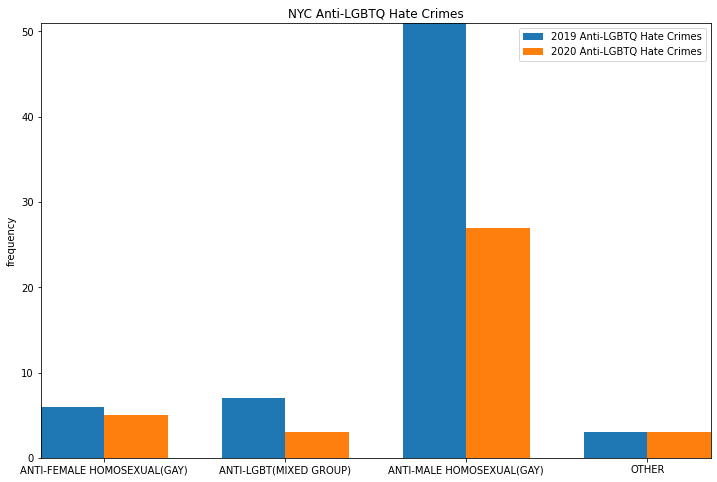

In [330]:

import matplotlib.pyplot as plt
labels = uni
c2019 = count
c2020 = count2020

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
# plt.figure(figsize=(20, 6))
rects1 = ax.bar(x - width/2, c2019, width, label='2019 Anti-LGBTQ Hate Crimes')
rects2 = ax.bar(x + width/2, c2020, width, label='2020 Anti-LGBTQ Hate Crimes')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('frequency')
ax.set_title('NYC Anti-LGBTQ Hate Crimes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.autoscale(tight=True)
# figure = plt.figure()
# figure.set_size_inches(10, 5)
# fig.set_figheight(25)
# fig.set_figwidth(10)
# ax.figure(figsize=(20, 6))

## Part 6 - Conclusion

I can draw the conclusion that comparing these two years of data, anti-male homosexual hate crimes were still the most among all the other groups. Even though I did not put the crime severe degree of the hate crimes for these people, we can see from the count that most of the crimes are misdemeanor and some are felonies. This is very serious because the hate crimes are of no major reasons and the LGBTQ groups suffered from these a lot, especially for gays. We can see that female victims ratio is getting higher than 2019 in 2020. 
With the anti-race felonies brief analysis, I can find out that there are a lot of unclassified crimes which is concerning to me. 'Unclassified' is the major category of the hate crimes felony for anti-race crimes in NYC. Other than that, the most felonies are harassment. Overall, it is quite concerning to me that there are more anti-asian hate crimes than anti-black hate crimes in NYC.  
